In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<ipython-input-1-9558739c1801>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
AX_MIN_VALUE = 0.1
AX_MAX_VALUE = 0.7  # leave extra room for axis labels that may be long
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])
def _scale_data(data, ranges):
    result = []
    for d, (y1, y2) in zip(data, ranges):
        try:
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
        except AssertionError:
            print(d,y1,y2)
        result.append((d-y1)/(y2-y1)*(AX_MAX_VALUE-AX_MIN_VALUE) + AX_MIN_VALUE) # This is the formula to convert between 2 scales
    return result 

In [3]:
import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue',
              **{'sans-serif': 'Helvetica Neue'}) 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 11})

In [4]:
class ComplexRadar():
    def __init__(
        self, fig, variables, ranges,
        n_ordinate_levels=4,
        precision=2,
        textsize="30",
        numberssize="larger",
        textposrate=1.1,
        textposrotation=60
    ):
        angles = np.arange(0, 360, 360./len(variables))
        axes = [
            fig.add_axes(
                [AX_MIN_VALUE,AX_MIN_VALUE,AX_MAX_VALUE,AX_MAX_VALUE],
                polar=True,
                label = "axes{}".format(i)
            )
            for i in range(len(variables))
        ]
        
        
        #mqm - apparently axes[0] is the circle perimeter, with the var names
        
        l, text = axes[0].set_thetagrids(angles,
                                         labels=variables,
                                         #frac=textposrate, #no longer exists
                                         horizontalalignment='center',
                                         position=(0.0,1-textposrate),
                                         size=textsize)
        
        
        #Rotation is a mistery in newer versions of matplotlib
        # was: [txt.set_rotation(angle - textposrotation) for txt, angle in zip(text, angles)]
        #works but same value for all. Useless
        #axes[0].tick_params(axis='x', labelrotation=60)
        #does not work
        #[txt.set_rotation(angle-textposrotation) for txt, angle in zip(text, angles)]
        #does not work
        #locs, labels = axes[0].get_xticks()
        #[label.set_rotation(180) for label in labels]
        #does not work
        #for label,angle in zip (axes[0].get_xticklabels(), angles): # https://stackoverflow.com/questions/43152502/how-can-i-rotate-xticklabels-in-matplotlib-so-that-the-spacing-between-each-xtic
        #    #label.set_ha("left") # works
        #    label.set_rotation(angle-textposrotation) # does not work
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],
                               num=n_ordinate_levels)
            adjusted_range = [(AX_MIN_VALUE,AX_MAX_VALUE) for i in range(len(ranges))] # radial grids must be strictly positive in matplotlib
            adjusted_grid = np.linspace(*adjusted_range[i],
                               num=n_ordinate_levels)
            
            gridlabel = ["{}".format(round(x,precision))
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(adjusted_grid, labels=gridlabel,
                         angle=angles[i], size=numberssize)
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*adjusted_range[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

['MoleculeNet GC', 'ChemBERTa', 'D-MPNN', 'GROVER large', 'Chemformer', 'MolFormer-Xl', 'MolCLR', 'iMolCLR', 'Attentive FP', 'RF MolCLR', 'SVM MolCLR', 'GIN', '3D_Infomax', 'BARTSmiles']


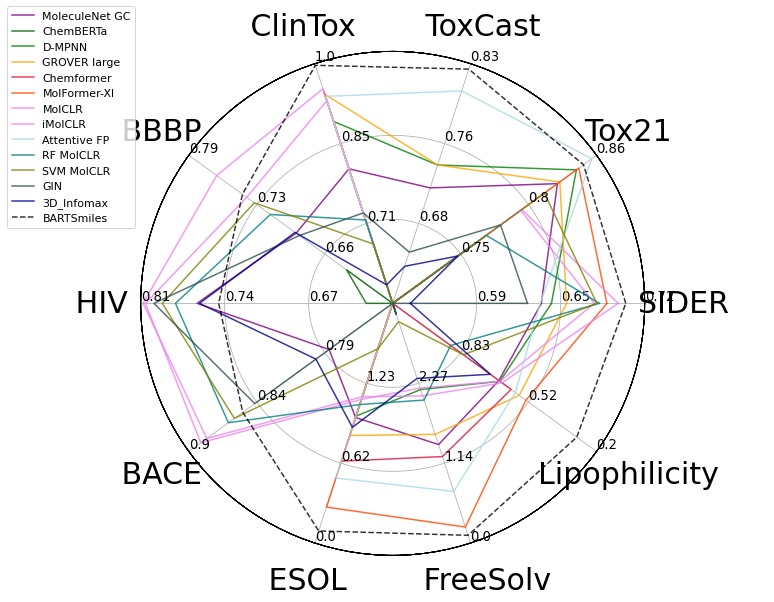

In [23]:
# Based on source from http://stackoverflow.com/questions/38263313/radial-grids-must-be-strictly-positive-error-on-radar-chart
data_name = "MoleculeNet"


RF =            [0.684, 0.769, 0.61,  0.713, 0.714, 0.781, 0.867, 1.07,  2.03,  0.88]
SVM =           [0.682, 0.818, 0.61,  0.669, 0.729, 0.792, 0.862, 1.5,   3.14,  0.82]

MoleculeNet =   [0.638, 0.829, 0.716, 0.807, 0.69,  0.763, 0.783, 0.97,  1.4,   0.655]
D_MPNN =        [0.646, 0.845, 0.737, 0.894, 0.6,   0.6 ,  0.73,  0.98,  2.18,  0.65]
Attentive_FP =  [0.637, 0.858, 0.805, 0.94,  0.6,   0.6 ,  0.73,  0.503, 0.736, 0.578]
TreeD_Infomax = [0.534, 0.745, 0.644, 0.594, 0.691, 0.761, 0.794, 0.894, 2.337, 0.695]

ChemBERTa =     [0.52,  0.76,  0.61,  0.56,  0.643, 0.622, 0.73,  1.85,  3.25,  1.15]
MolFormer_Xl =  [0.69,  0.847, 0.61,  0.948, 0.6,   0.6 ,  0.73,  0.279, 0.231, 0.529]
GIN          =  [0.627, 0.781, 0.657, 0.726, 0.687, 0.799, 0.845, 1.85,  3.25,  1.15]
GROVER_large =  [0.658, 0.831, 0.737, 0.944, 0.6,   0.6 ,  0.73,  0.831, 1.544, 0.56 ]
MolCLR =        [0.68,  0.798, 0.61,  0.932, 0.736, 0.806, 0.89,  1.11,  2.2,   0.65 ]
iMolCLR =       [0.699, 0.799, 0.61,  0.954, 0.764, 0.808, 0.885, 1.13,  2.09,  0.64]
Chemformer =    [0.52,  0.76,  0.61,  0.56,  0.6,   0.6 ,  0.73,  0.633, 1.23,  0.598]
# YerevaNN = [0.593, 0.784, 0.825, 0.999, 0.739, 0.749, 0.854, 0.117, 0.173, 0.3]
BARTSmiles =    [0.705, 0.851, 0.825, 0.997, 0.74, 0.745, 0.855,  0.095, 0.114, 0.292]

data = [["SIDER", "Tox21", "ToxCast", "ClinTox", "BBBP", "HIV", "BACE", "ESOL", "FreeSolv", "Lipophilicity"],
        [ MoleculeNet, ChemBERTa, D_MPNN, GROVER_large, Chemformer, MolFormer_Xl, MolCLR, iMolCLR, Attentive_FP, RF, SVM, GIN, TreeD_Infomax, BARTSmiles ]]



data[0] = [
    i.center(13) for i in data[0]
]

ranges = [(0.52, 0.72), (0.69, 0.862), (0.61, 0.83),
        (0.56, 1), (0.6, 0.79), (0.6, 0.81), (0.73, 0.9), (1.85, 0.002), (3.4, 0.005), (1.15, 0.2)]
model_names = [
    "MoleculeNet GC", 
    'ChemBERTa', 
    'D-MPNN', 
    "GROVER large", 
    "Chemformer", 
    "MolFormer-Xl", 
    "MolCLR", 
    "iMolCLR", 
    "Attentive FP", 
    "RF MolCLR", 
    "SVM MolCLR", 
    "GIN",
    "3D_Infomax", 
    "BARTSmiles"
]

print(model_names)

variables = data[0]

# plotting
fig1 = plt.figure(figsize=(13, 10))
radar = ComplexRadar(fig1, variables, ranges)

col = [
    "purple",
    "darkgreen",
    "green",
    "orange",
    "crimson",
    "orangered",
    "violet", 
    "violet", 
    "lightblue", 
    "teal", 
    "olive", 
    "darkslategrey",
    "darkblue",
    "black",

]


for i in range(len(data[1])):
    if model_names[i] in ["BARTSmiles", "BARTSmiles Sample + ReRank", "BARTSmiles Beam-10"]:
            radar.plot(data[1][i], color=col[-1], linestyle="dashed", label=model_names[i], alpha=0.8)
    else:
            radar.plot(data[1][i], color=col[i], label=model_names[i], alpha=0.8)

radar.ax.legend(bbox_to_anchor=(0, 1.1))

plt.show()   
fig1.savefig(f"{data_name}_cycle_.pdf")
fig1.savefig(f"{data_name}_cycle_.png")

In [8]:
print(variables)

['....SIDER....', '....Tox21....', '...ToxCast...', '...ClinTox...', '.....BBBP....', '.....HIV.....', '.....BACE....', '.....ESOL....', '...FreeSolv..', 'Lipophilicity']
